# **Klasifikasi Jenis Citra Mobil dengan Menggunakan Random Forest**
---
Ketua Kelompok : Alvito Jordan (201110586)

Anggota Kelompok :
*   Evander (201110440)
*   Enrique Kuandy (201111290)
*   Willy Wijaya (201110435)

Dataset : kami memilih dataset citra sebanyak 50 buah (25 sedan dan 25 SUV).

# **Import Library**

In [ ]:
from google.colab import files
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import os
import cv2
from joblib import dump, load
import imghdr

# **Import Dataset**

In [ ]:
# Upload file
files.upload()

# ekstrak file zip
!unzip CarDataset.zip

Saving CarDataset.zip to CarDataset.zip
Archive:  CarDataset.zip
  inflating: CarDataset/01.jpg       
  inflating: CarDataset/02.jpg       
  inflating: CarDataset/03.jpg       
  inflating: CarDataset/04.jpg       
  inflating: CarDataset/05.jpg       
  inflating: CarDataset/06.jpg       
  inflating: CarDataset/07.jpg       
  inflating: CarDataset/08.jpg       
  inflating: CarDataset/09.jpg       
  inflating: CarDataset/10.jpg       
  inflating: CarDataset/11.jpg       
  inflating: CarDataset/12.jpg       
  inflating: CarDataset/13.jpg       
  inflating: CarDataset/14.jpg       
  inflating: CarDataset/15.jpg       
  inflating: CarDataset/16.jpg       
  inflating: CarDataset/17.jpg       
  inflating: CarDataset/18.jpg       
  inflating: CarDataset/19.jpg       
  inflating: CarDataset/20.jpg       
  inflating: CarDataset/21.jpg       
  inflating: CarDataset/22.jpg       
  inflating: CarDataset/23.jpg       
  inflating: CarDataset/24.jpg       
  inflating: CarDataset

# **Preprocesing Dataset Citra**

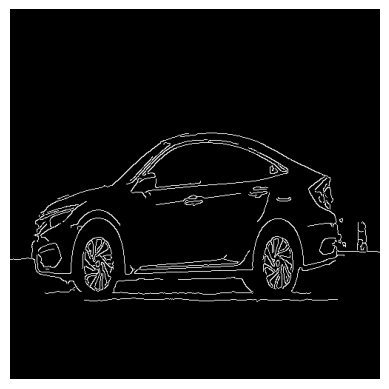

In [ ]:
def preprocessing(image_path):
    # Membaca gambar menggunakan OpenCV
    image = cv2.imread(image_path)

    # Resize gambar menjadi ukuran 100x100
    resized_image = cv2.resize(image, (500, 500))

    # Menghaluskan gambar dengan filter Gaussian
    gaussian = cv2.GaussianBlur(resized_image, (5, 5), 0)

    # Deteksi tepi menggunakan Canny edge detection
    edges = cv2.Canny(gaussian, 100, 200)

    return edges

image_path = "/content/CarDataset/01.jpg"
result = preprocessing(image_path)

# Menampilkan gambar hasil preprocessing
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

# **Memberikan Label pada dataset**

In [ ]:
data = []
labels = []

# Mendapatkan path folder yang berisi gambar
folder_path = "/content/CarDataset"

# Mendapatkan semua file gambar dalam folder
image_files = [file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Mengurutkan daftar file
image_files.sort()

# Memproses setiap file gambar dalam folder
for i, image_file in enumerate(image_files):

    # Mendapatkan path file gambar
    image_path = os.path.join(folder_path, image_file)

    # Memanggil fungsi preprocessing untuk setiap citra
    result = preprocessing(image_path)

    data.append(result)

    # Menetapkan label berdasarkan indeks
    if i <= 24:
        labels.append(0) # Mobil Sedan
    else:
        labels.append(1) # Mobil SUV

X = np.array(data)
y = np.array(labels)

# **Pisahkan Data Menjadi Data Training dan Testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 30)
print(len(X_train), len(X_test), len(y_train), len(y_test))

40 10 40 10


In [ ]:
# Menampilkan jumlah data mobil sedan dan mobil SUV pada data training dan data testing
print("Jumlah data mobil sedan (training):", sum(y_train == 0))
print("Jumlah data mobil SUV (training):", sum(y_train == 1))
print("Jumlah data mobil sedan (testing):", sum(y_test == 0))
print("Jumlah data mobil SUV (testing):", sum(y_test == 1))

Jumlah data mobil sedan (training): 20
Jumlah data mobil SUV (training): 20
Jumlah data mobil sedan (testing): 5
Jumlah data mobil SUV (testing): 5


# **Mengubah Dimensi data menjadi 2 dimensi**

In [ ]:
print(X.shape)

(50, 500, 500)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)
print(X_test.shape)

(40, 250000)
(10, 250000)


# **Membuat Model Random Forest**

In [ ]:
model = RandomForestClassifier(n_estimators= 20, random_state = 30)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=30)

In [ ]:
y_pred = model.predict(X_test)

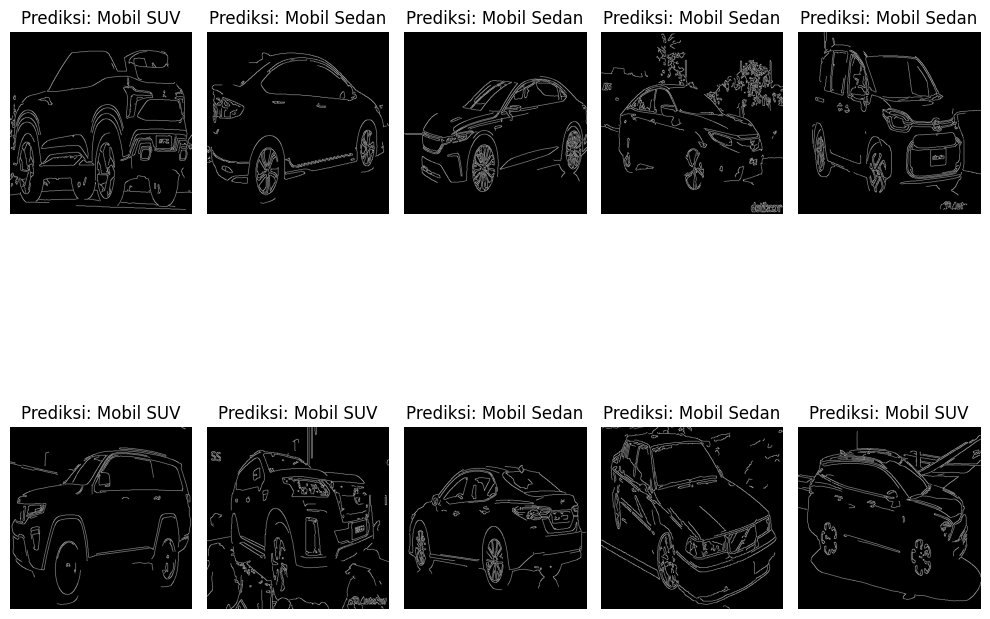

In [ ]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menentukan jumlah baris dan kolom dalam grid subplot
num_rows = 2
num_cols = 5

imageResized = (500, 500)

# Mengatur ukuran gambar subplot
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))

# Loop untuk menampilkan gambar dengan hasil prediksi
for i, ax in enumerate(axes.flatten()):
    # Mendapatkan gambar dan label yang diprediksi
    test_image = X_test[i].reshape(imageResized[0], -1)
    if(y_pred[i] == 0):
        predicted_label = "Mobil Sedan"
    else:
        predicted_label = "Mobil SUV"

    # Menampilkan gambar dan label
    ax.imshow(test_image, cmap='gray')
    ax.axis('off')
    ax.set_title('Prediksi: ' + predicted_label)

# Menyesuaikan tata letak subplot
plt.tight_layout()
plt.show()

# **Menghitung Akurasi dan Evaluasi Peforma Model**

In [ ]:
accuracy = accuracy_score(y_pred, y_test) * 100
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 90.00%


In [ ]:
# CM digunakan untuk melihat seberapa baik model dapat melakukan klasifikasi pada setiap kelas target

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan setiap elemen secara terpisah
TN = cm[0, 0]  # True Negative
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative
TP = cm[1, 1]  # True Positive

# Menampilkan hasil
print("True Negative (TN):", TN) # Jumlah mobil sedan yang berhasil diklasifikasikan dengan benar sebagai sedan oleh model.
print("False Positive (FP):", FP) # Jumlah mobil sedan yang salah diklasifikasikan sebagai SUV oleh model.
print("False Negative (FN):", FN) # Jumlah mobil SUV yang salah diklasifikasikan sebagai sedan oleh model.
print("True Positive (TP):", TP) # Jumlah mobil SUV yang berhasil diklasifikasikan dengan benar sebagai SUV oleh model.

True Negative (TN): 5
False Positive (FP): 0
False Negative (FN): 1
True Positive (TP): 4


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.80      1.00      0.89         4

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



# **Simpan Model**

In [ ]:
# Menyimpan model ke dalam file
dump(model, 'RFmodel.joblib')

['RFmodel.joblib']

# **Load Model untuk Melakukan Prediksi Gambar yang Diupload Dari User**

In [ ]:
# Membaca model dari file
model_from_file = load('RFmodel.joblib')

Saving GambarSUV2.png to GambarSUV2.png


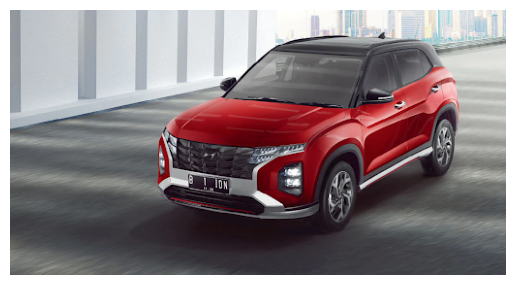


Hasil Prediksi = Mobil SUV


In [ ]:
# Upload file gambar
uploaded_files = files.upload()

# Memastikan hanya satu file gambar yang diupload
if len(uploaded_files) != 1:
    raise ValueError("Mohon upload satu file gambar saja.")

# Mendapatkan path file gambar yang diupload
image_path = next(iter(uploaded_files))

# Memeriksa ekstensi file yang diupload
allowed_extensions = {'jpg', 'jpeg', 'png'}
file_extension = imghdr.what(image_path)

if file_extension is None or file_extension not in allowed_extensions:
    raise ValueError("File yang diupload bukan merupakan file gambar yang valid.")

# Melakukan preprocessing pada gambar
preprocessed_image = preprocessing(image_path)

# Mengubah dimensi gambar
image_vector = preprocessed_image.reshape(1, -1)

# Melakukan prediksi menggunakan model yang telah dimuat
prediction = model_from_file.predict(image_vector)

if(prediction == 0):
  prediction = "Mobil Sedan"
if(prediction == 1):
  prediction = "Mobil SUV"

# Membaca gambar
image = cv2.imread(image_path)

# Konversi warna BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
print("\nHasil Prediksi =",prediction)

os.remove(image_path)